# Evaluation Phase II Modell M1

In [1]:
import arrow
import numpy as np
import os
import glob
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
%run -i ./scripts/setConfigs.py

Set configs..


In [3]:
from matplotlib import rc
rc('text', usetex=True)

In [4]:
os.chdir(os.path.join(exp_data_path, 'experiment', 'fine_tuning'))
extension = 'csv'
result = glob.glob('*.{}'.format(extension))

In [5]:
result_fns = []

for res in result:
    if 'tVPII' not in res:
        result_fns.append(res)

In [6]:
len(result_fns)

226

In [7]:
df_experiments = pd.read_csv(result_fns[0], sep=';')

In [8]:
df_experiments.head()

,optimizer,fine_tune_classes,name_pretrained_model,k,fine_tune_iterations,lr,model_fn,pretrained_model_fn,logreg_fn,TP_x_test,TN_x_test,FP_x_test,FN_x_test,TP_x_drifted_ano,TN_x_drifted_ano,FP_x_drifted_ano,FN_x_drifted_ano,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test,Accuracy_x_drifted_ano,Precision_x_drifted_ano,Specifity_x_drifted_ano,Sensitivity_x_drifted_ano
0,Adam,[2],3,20,64,0.001,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2413,31468,1075,84,2412,28402,4141,85,96.692352,69.180046,92.878014,96.635963,87.939498,36.807569,92.172389,96.595915


In [9]:
for file in result_fns[1:]:
    df = pd.read_csv(file, sep=';')
    df_experiments = df_experiments.append(df)

In [10]:
len(df_experiments)

226

In [12]:
os.chdir('..')
os.chdir('..')
print(os.getcwd())

/home/torge/dev/masterthesis_code/02_Experimente/03_Experimente


In [13]:
df_experiments.head()

,optimizer,fine_tune_classes,name_pretrained_model,k,fine_tune_iterations,lr,model_fn,pretrained_model_fn,logreg_fn,TP_x_test,TN_x_test,FP_x_test,FN_x_test,TP_x_drifted_ano,TN_x_drifted_ano,FP_x_drifted_ano,FN_x_drifted_ano,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test,Accuracy_x_drifted_ano,Precision_x_drifted_ano,Specifity_x_drifted_ano,Sensitivity_x_drifted_ano
0,Adam,[2],3,20,64,0.001,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2413,31468,1075,84,2412,28402,4141,85,96.692352,69.180046,92.878014,96.635963,87.939498,36.807569,92.172389,96.595915
0,SGD,"[1, 2, 3]",6,10,64,0.010,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2487,15098,17445,10,2487,13630,18913,10,50.185502,12.477423,85.857265,99.599519,45.996005,11.621495,84.569089,99.599519
0,SGD,"[2, 3]",5,5,1,0.010,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2456,28811,3732,41,2466,25853,6690,31,89.232306,39.689722,92.145073,98.358030,80.819064,26.933159,91.292065,98.758510
0,Adam,[1],3,10,1,0.001,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2440,30601,1942,57,2441,27641,4902,56,94.295091,55.682337,92.615236,97.717261,85.850457,33.242544,91.885513,97.757309
0,Adam,"[1, 3]",6,5,128,0.001,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2484,13784,18759,13,2485,12328,20215,12,46.426941,11.693264,84.730760,99.479375,42.274543,10.947137,83.224195,99.519423


In [14]:
result_cols_x_test = ['Accuracy_x_test', 'Precision_x_test', 'Specifity_x_test', 'Sensitivity_x_test']
result_cols_x_drifted_ano = ['Accuracy_x_drifted_ano', 'Precision_x_drifted_ano', 'Specifity_x_drifted_ano', 'Sensitivity_x_drifted_ano']

In [15]:
df_res_x_test = df_experiments[result_cols_x_test]
df_res_x_drifted_ano = df_experiments[result_cols_x_drifted_ano]

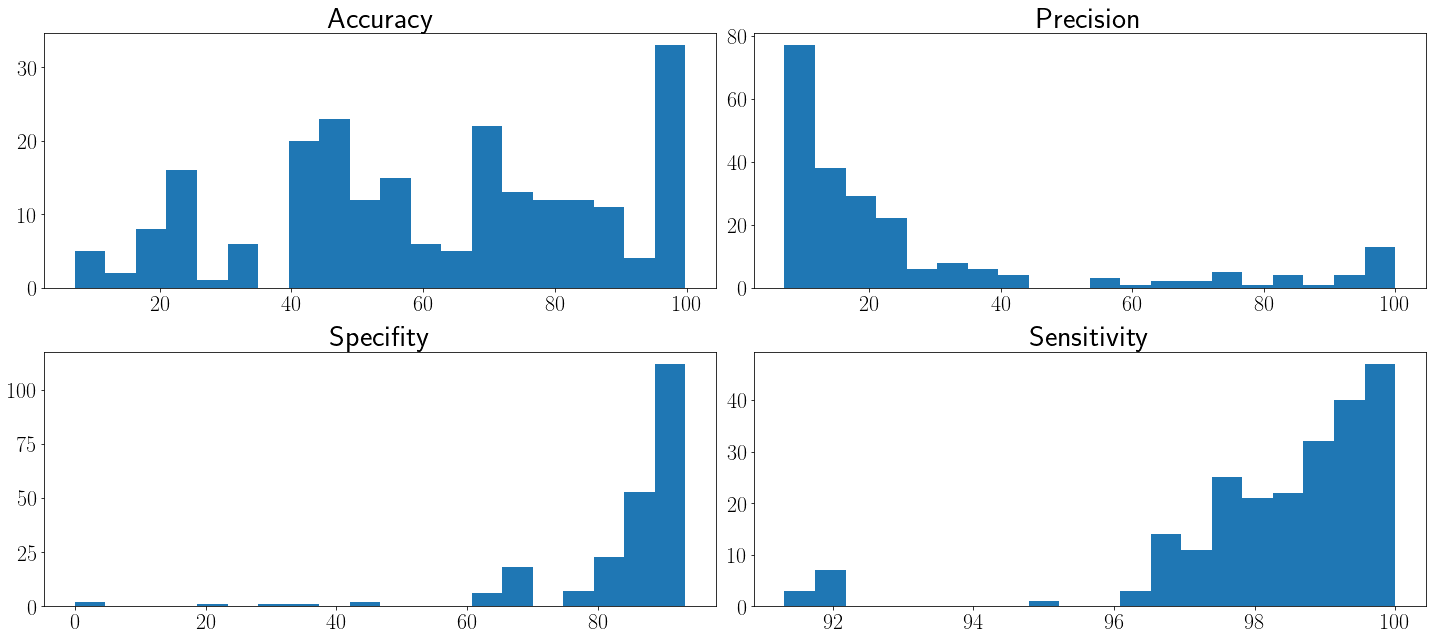

In [35]:
fig, ax= plt.subplots(2,2, figsize=(20,10))

#df_res_x_test['Accuracy_x_test'].value_counts().sort_index().plot.bar(ax=ax[0][0])
ax[0][0].hist(df_res_x_test['Accuracy_x_test'], bins=20)
ax[0][0].set_title('Accuracy',fontsize=30)
ax[0][0].tick_params(axis='both', which='major', labelsize=22)

ax[0][1].hist(df_res_x_test['Precision_x_test'], bins=20)
ax[0][1].set_title('Precision',fontsize=30)
ax[0][1].tick_params(axis='both', which='major', labelsize=22)

ax[1][0].hist(df_res_x_test['Specifity_x_test'], bins=20)
ax[1][0].set_title('Specifity',fontsize=30)
ax[1][0].tick_params(axis='both', which='major', labelsize=22)

ax[1][1].hist(df_res_x_test['Sensitivity_x_test'], bins=20)
ax[1][1].set_title('Sensitivity',fontsize=30)
ax[1][1].tick_params(axis='both', which='major', labelsize=22)

#fig.suptitle('Histogramme der Kennzahlen der Modelle des Versuchsplans $\displaystyle tVP^{I}_{M_1}$ auf  $X_{test}$', fontsize=30)

fig.tight_layout(rect=[0, 0.03, 1, 0.93])

save = True
if save:
    fn = os.path.join(os.getcwd(), 'figs', '{}_results_tvp_2_m1_hists_x_test.pdf'.format(arrow.now().format('YYYYMMDD')))
    fig.savefig(fn, bbox_inches='tight', pad_inches=0)

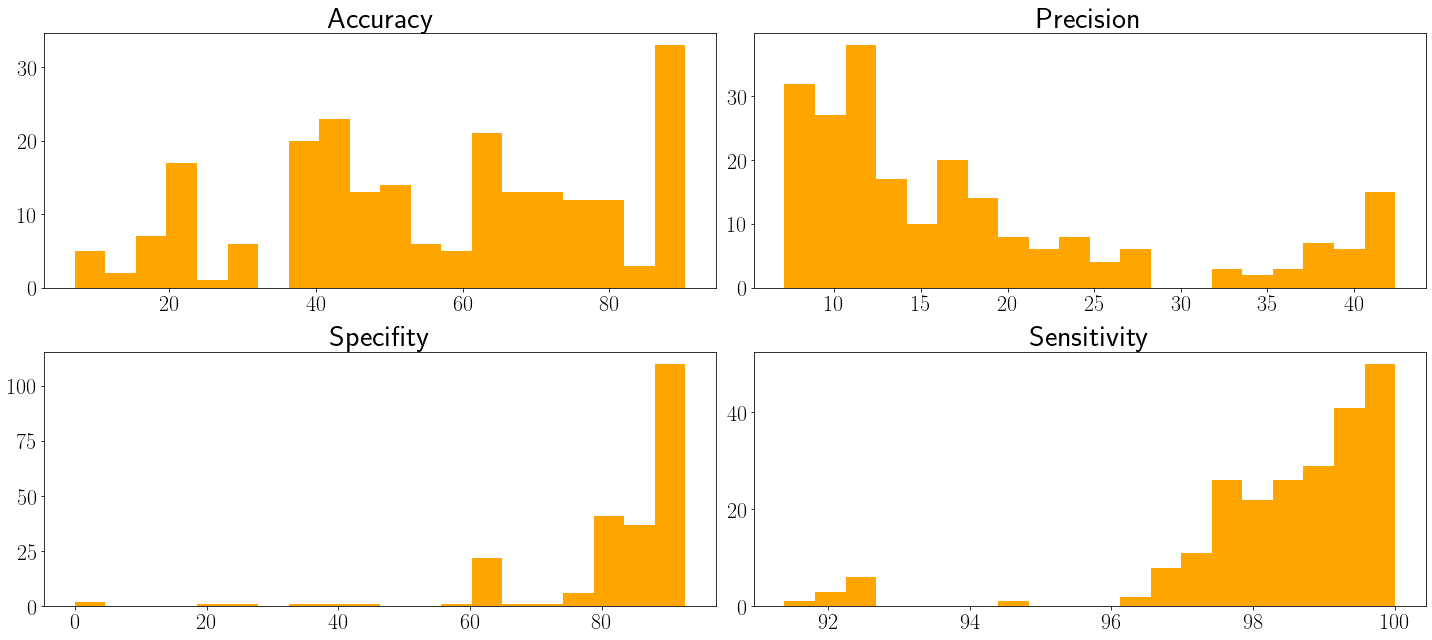

In [34]:
fig, ax= plt.subplots(2,2, figsize=(20,10))

ax[0][0].hist(df_res_x_drifted_ano['Accuracy_x_drifted_ano'], bins=20, color='orange')
ax[0][0].set_title('Accuracy',fontsize=30)
ax[0][0].tick_params(axis='both', which='major', labelsize=22)

ax[0][1].hist(df_res_x_drifted_ano['Precision_x_drifted_ano'], bins=20, color='orange')
ax[0][1].set_title('Precision',fontsize=30)
ax[0][1].tick_params(axis='both', which='major', labelsize=22)

ax[1][0].hist(df_res_x_drifted_ano['Specifity_x_drifted_ano'], bins=20, color='orange')
ax[1][0].set_title('Specifity',fontsize=30)
ax[1][0].tick_params(axis='both', which='major', labelsize=22)

ax[1][1].hist(df_res_x_drifted_ano['Sensitivity_x_drifted_ano'], bins=20, color='orange')
ax[1][1].set_title('Sensitivity',fontsize=30)
ax[1][1].tick_params(axis='both', which='major', labelsize=22)

#fig.suptitle('Histogramme der Kennzahlen der Modelle des Versuchsplans $\displaystyle tVP^{I}_{M_1}$ auf  $X_{drifted,ano}$', fontsize=30)

fig.tight_layout(rect=[0, 0.03, 1, 0.93])

save = True
if save:
    fn = os.path.join(os.getcwd(), 'figs', '{}_results_tvp_2_m1_hists_x_drifted_ano.pdf'.format(arrow.now().format('YYYYMMDD')))
    fig.savefig(fn, bbox_inches='tight', pad_inches=0)

In [19]:
df_res_x_drifted_ano.describe()

,Accuracy_x_drifted_ano,Precision_x_drifted_ano,Specifity_x_drifted_ano,Sensitivity_x_drifted_ano
count,226.000000,226.000000,226.000000,226.000000
mean,55.894401,17.999863,82.942866,98.426608
std,23.233713,10.433545,13.896941,1.648265
min,7.126142,7.126142,0.000000,91.389668
25%,40.284675,10.625956,82.456147,97.797357
50%,56.482591,13.933007,87.555234,98.758510
75%,75.541524,22.352302,90.725261,99.559471
max,90.368151,42.362561,92.758314,100.000000


In [20]:
df_res_x_test.describe()

,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test
count,226.000000,226.000000,226.000000,226.000000
mean,61.434202,27.412332,84.239203,98.322943
std,25.813351,26.760310,13.583759,1.735885
min,7.126142,7.126142,0.000000,91.309571
25%,44.159532,11.250755,83.953681,97.647177
50%,61.903539,15.627779,88.626619,98.758510
75%,83.031535,29.386322,91.554094,99.519423
max,99.797374,100.000000,93.452603,100.000000


In [21]:
df_experiments.head()

,optimizer,fine_tune_classes,name_pretrained_model,k,fine_tune_iterations,lr,model_fn,pretrained_model_fn,logreg_fn,TP_x_test,TN_x_test,FP_x_test,FN_x_test,TP_x_drifted_ano,TN_x_drifted_ano,FP_x_drifted_ano,FN_x_drifted_ano,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test,Accuracy_x_drifted_ano,Precision_x_drifted_ano,Specifity_x_drifted_ano,Sensitivity_x_drifted_ano
0,Adam,[2],3,20,64,0.001,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2413,31468,1075,84,2412,28402,4141,85,96.692352,69.180046,92.878014,96.635963,87.939498,36.807569,92.172389,96.595915
0,SGD,"[1, 2, 3]",6,10,64,0.010,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2487,15098,17445,10,2487,13630,18913,10,50.185502,12.477423,85.857265,99.599519,45.996005,11.621495,84.569089,99.599519
0,SGD,"[2, 3]",5,5,1,0.010,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2456,28811,3732,41,2466,25853,6690,31,89.232306,39.689722,92.145073,98.358030,80.819064,26.933159,91.292065,98.758510
0,Adam,[1],3,10,1,0.001,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2440,30601,1942,57,2441,27641,4902,56,94.295091,55.682337,92.615236,97.717261,85.850457,33.242544,91.885513,97.757309
0,Adam,"[1, 3]",6,5,128,0.001,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,2484,13784,18759,13,2485,12328,20215,12,46.426941,11.693264,84.730760,99.479375,42.274543,10.947137,83.224195,99.519423
